In [1]:
suppressPackageStartupMessages(require(tidyverse))
suppressPackageStartupMessages(require(data.table))


In [2]:
require(ggrepel)

Loading required package: ggrepel


In [3]:
outd <- file.path(getwd(), 'out')

traits <- fread('cascade.input.files.tsv')


In [5]:
imp_anno_df <-
fread(cmd=paste('zstdcat', file.path(outd, 'cascade.imp.hits.tsv.zst'), sep=' '), sep='\t')


In [6]:
imp_anno_df %>% dim()

[1] 6477   22

In [7]:
imp_anno_df %>% colnames()

[1] "ID"                "REF"               "ALT"              
 [4] "Effect"            "StdErr"            "Direction"        
 [7] "HetISq"            "HetChiSq"          "HetDf"            
[10] "HetPVal"           "maf"               "MACH_R2"          
[13] "CHROM"             "POS"               "P"                
[16] "CM"                "id"                "prev"             
[19] "block"             "name"              "is_outside_of_MHC"
[22] "is_rare"

In [10]:
p.imp <- imp_anno_df %>% 
mutate(
    outlier = if_else(abs(Effect) >= .1, TRUE, FALSE),
#     plot_label = paste0(ID, ' (', Gene_symbol, ')'),
    plot_label = ID,
    plot_label = str_replace(plot_label, '[(][)]$', ''),
    plot_label = str_replace(plot_label, '[(]NA[)]$', ''),    
    ggrepel = if_else(abs(Effect) >= .1, plot_label, "")
) %>%
ggplot(
    aes(x=maf, y=Effect, color=outlier, label = ggrepel)
) +
geom_hline(yintercept = 0, linetype="dashed") +
geom_point() + theme_bw() + 
labs(
    title = 'Non-coding variants',
    x = 'Minor allele frequency (log-scale)',
    y = 'BETAs'
) +
theme(
    strip.text = element_text(size=7),
    legend.position="none"
)+
scale_color_brewer(palette="Dark2") + 
scale_x_continuous(trans="log10", breaks=10 * 100**(-3:-1)) + 
facet_wrap(~name, ncol = 6, strip.position = "bottom", labeller = label_wrap_gen(17)) + 
ggrepel::geom_text_repel(size=2)


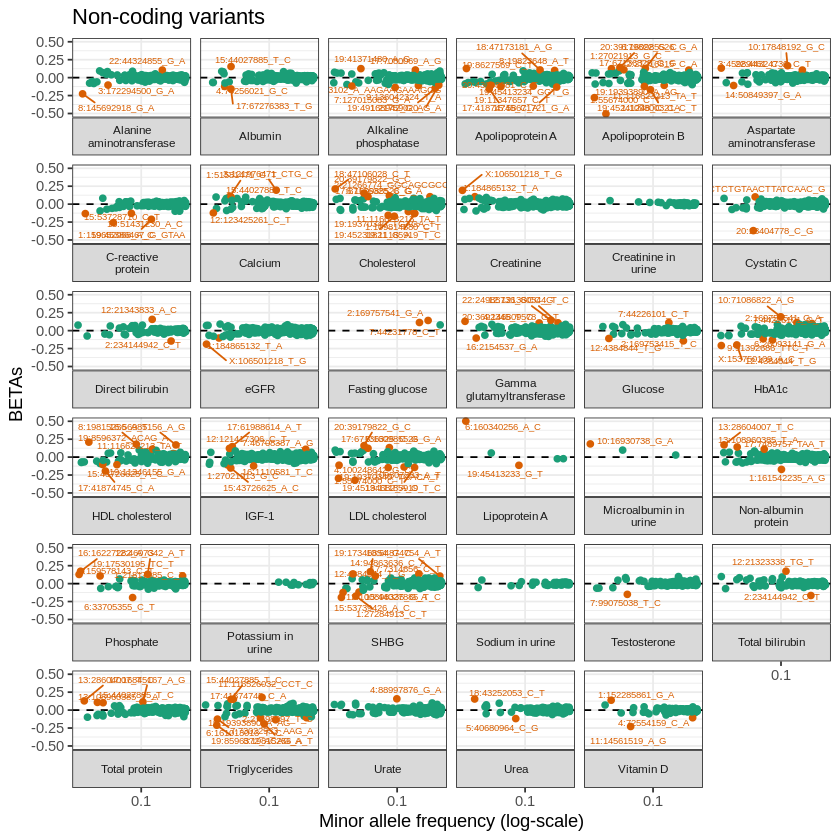

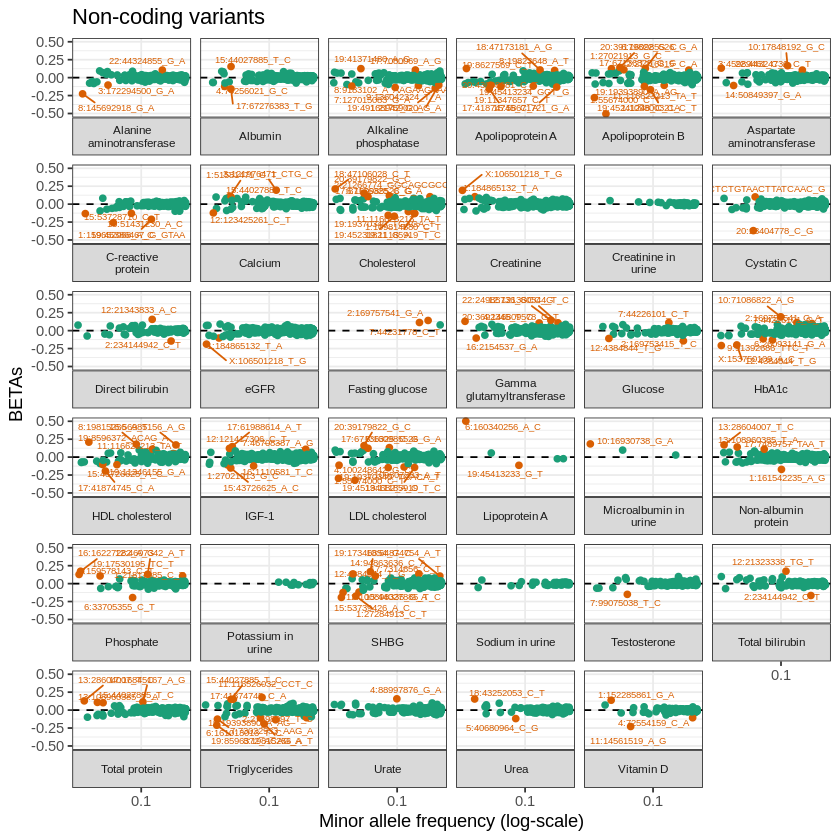

In [11]:
p.imp + ggsave(file.path(outd, "cascade.imp.png"), width = 10, height = 10)
p.imp + ggsave(file.path(outd, "cascade.imp.pdf"), width = 10, height = 10)
